# 求人サイト
グループ共通で年収を調べる
→年収と何かしらの関係をメインテーマ

**メインテーマとしてtypeの総合ランキングから上位20社の年収と位置情報の関係を可視化し、考察する**

# メインテーマのデータ取得

In [2]:
import requests
from bs4 import BeautifulSoup
import time

# サーバーへの負荷を軽減するための待機時間
time.sleep(30)

# 企業リストページのURL
list_url = "https://type.jp/rank/"

# リストページのリクエスト
response = requests.get(list_url)
if response.status_code == 200:
    print("リストページの取得成功")
else:
    print(f"リストページの取得失敗: {response.status_code}")

# BeautifulSoupでページを解析
soup = BeautifulSoup(response.content, 'html.parser')

#全てのspanタグ、class = salaryとclass = placeを取得して表示
salary_spans = soup.find_all('span', class_="salary")
place_spans = soup.find_all('span', class_="place")

print("年収")
for i, span in enumerate(salary_spans):
    print(f"{i + 1}: {span.get_text(strip=True)}")

print("位置:")
for i, span in enumerate(place_spans):
    print(f"{i + 1}: {span.get_text(strip=True)}")



リストページの取得成功
年収
1: 250～1000万円
2: 350～1000万円
3: 250～750万円
4: 300～700万円
5: 300～1000万円
6: 450～850万円
7: -
8: 250～1400万円
9: -
10: 350～600万円
11: 300～500万円
12: 300～1100万円
13: 350～600万円
14: 350～800万円
15: 350～1000万円
16: 250～800万円
17: 300～600万円
18: -
19: 350～600万円
20: 300～600万円
位置:
1: 東京都、神奈川県、埼玉県、千葉県、愛知県、大阪府、福岡県
2: 東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、熊本県、大分県、宮崎県、鹿児島県
3: 東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、熊本県、大分県、宮崎県、鹿児島県、沖縄県
4: 東京都、神奈川県、埼玉県、千葉県、大阪府
5: 東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、熊本県、大分県、宮崎県、鹿児島県、沖縄県
6: 東京都
7: 東京都
8: 東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、

# メインテーマのデータ保存

In [3]:
import sqlite3


# SQLiteデータベースの作成または接続
conn = sqlite3.connect("job_data.db")
cursor = conn.cursor()

# テーブルの作成
cursor.execute("""
CREATE TABLE IF NOT EXISTS job_data (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    salary TEXT,
    location TEXT
)
""")

# スクレイピングしたデータを挿入
for salary, place in zip(salary_spans, place_spans):
    cursor.execute("INSERT INTO job_data (salary, location) VALUES (?, ?)",
                   (salary.get_text(strip=True), place.get_text(strip=True)))

conn.commit()
conn.close()
print("データベースに保存が完了しました。")

データベースに保存が完了しました。


In [4]:
#データベース
import sqlite3
import pandas as pd

# SQLiteデータベースに接続
conn = sqlite3.connect('job_data.db')

# SQLクエリを実行してデータを取得
query = "SELECT * FROM job_data"

# データをDataFrameに読み込む
df = pd.read_sql(query, conn)

# 結果を表示
print(df)

# データベース接続を閉じる
conn.close()

    id      salary                                           location
0    1  250～1000万円                       東京都、神奈川県、埼玉県、千葉県、愛知県、大阪府、福岡県
1    2  350～1000万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...
2    3   250～750万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...
3    4   300～700万円                               東京都、神奈川県、埼玉県、千葉県、大阪府
4    5  300～1000万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...
5    6   450～850万円                                                東京都
6    7           -                                                東京都
7    8  250～1400万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...
8    9           -                                                新潟県
9   10   350～600万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...
10  11   300～500万円                                                東京都
11  12  300～1100万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...
12  13   350～600万円                                       東京都、神奈川県、大阪府
13  14   350～800万円  

# 分析・可視化

In [5]:
def convert_salary_to_numeric(salary):
    try:
        # '万円' を削除し、'～' を '-' に置換
        salary = salary.replace('万円', '').replace('～', '-')
        if '-' in salary:
            # 範囲を分割して数値化（空文字列を防ぐ）
            parts = salary.split('-')
            if len(parts) == 2 and parts[0] and parts[1]:  # 両方が空でないことを確認
                low, high = map(float, parts)
                return (low + high) / 2  # 中間値を返す
        return float(salary)  # 単一値はそのまま返す
    except ValueError:
        # 不正な形式の場合、デフォルト値を返す
        print(f"変換エラー: {salary}")
        return None  # 必要に応じて適切なデフォルト値に変更

# 年収データの前処理
df['salary_numeric'] = df['salary'].apply(convert_salary_to_numeric)

# データ確認（エラーがあれば None となる）
print(df)

変換エラー: -
変換エラー: -
変換エラー: -
    id      salary                                           location  \
0    1  250～1000万円                       東京都、神奈川県、埼玉県、千葉県、愛知県、大阪府、福岡県   
1    2  350～1000万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
2    3   250～750万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
3    4   300～700万円                               東京都、神奈川県、埼玉県、千葉県、大阪府   
4    5  300～1000万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
5    6   450～850万円                                                東京都   
6    7           -                                                東京都   
7    8  250～1400万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
8    9           -                                                新潟県   
9   10   350～600万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
10  11   300～500万円                                                東京都   
11  12  300～1100万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
12  13   350～600万円      

In [6]:
print(df)

    id      salary                                           location  \
0    1  250～1000万円                       東京都、神奈川県、埼玉県、千葉県、愛知県、大阪府、福岡県   
1    2  350～1000万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
2    3   250～750万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
3    4   300～700万円                               東京都、神奈川県、埼玉県、千葉県、大阪府   
4    5  300～1000万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
5    6   450～850万円                                                東京都   
6    7           -                                                東京都   
7    8  250～1400万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
8    9           -                                                新潟県   
9   10   350～600万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
10  11   300～500万円                                                東京都   
11  12  300～1100万円  東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨...   
12  13   350～600万円                                 

In [7]:
# 欠損値の削除
df = df.dropna(subset=['salary_numeric', 'location'])

In [8]:
avg_salary_by_location = df.groupby('location')['salary_numeric'].mean()
print(avg_salary_by_location)

location
東京都                                                                                                                                                                                               525.000000
東京都、神奈川県、埼玉県、千葉県                                                                                                                                                                                  525.000000
東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、大分県、宮崎県、鹿児島県、沖縄県        450.000000
東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、熊本県、大分県、宮崎県、鹿児島県        675.000000
東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、熊

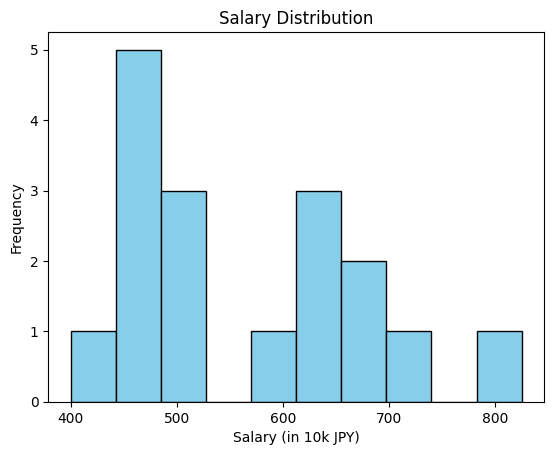

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

import seaborn as sns

# 全体の年収分布
plt.hist(df['salary_numeric'], bins=10, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary (in 10k JPY)')
plt.ylabel('Frequency')
plt.show()

# グラフを表示
plt.tight_layout()
plt.show()

In [10]:
!pip install japanize-matplotlib
import japanize_matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=ca4f84967536a79448214887eb403b72f65103724d326ff3609fee5cf659f143
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [11]:
!pip install geopandas matplotlib

In [12]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 38.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


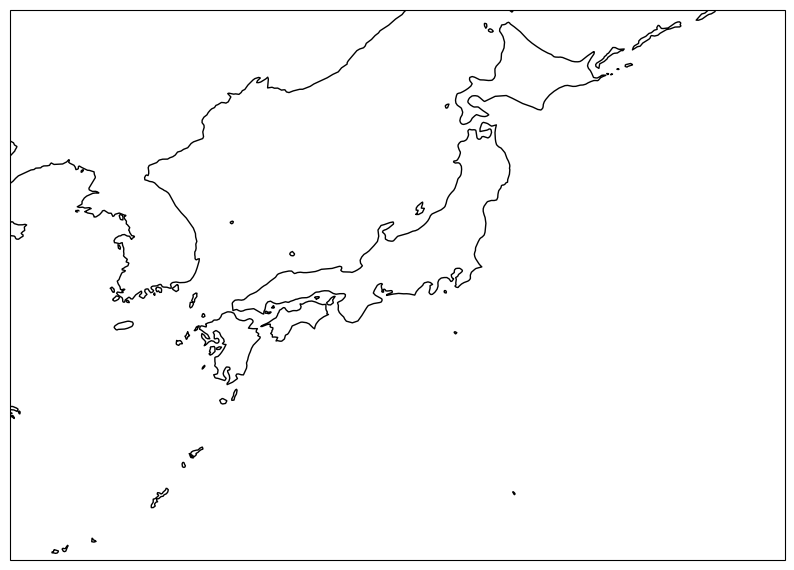

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Japanの地図を描く
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# 日本の国境を描画
ax.coastlines()
ax.set_extent([122, 153, 24, 46], crs=ccrs.PlateCarree())  # 日本の範囲

# 地図を表示
plt.show()

In [14]:
# メインデータ
data = {
    'id': [1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20],
    'salary_numeric': [675.0, 625.0, 475.0, 825.0, 650.0, 450.0, 475.0, 400.0, 475.0, 500.0, 800.0, 400.0, 525.0, 650.0, 550.0, 625.0],
    'location': [
        '東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県',
        '東京都、宮城県、愛知県、大阪府、広島県、愛媛県、福岡県',
        '東京都、神奈川県、大阪府',
        '東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、熊本県、大分県、宮崎県、鹿児島県、沖縄県',
        '東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、熊本県、大分県、宮崎県、鹿児島県、沖縄県',
        '東京都、神奈川県、埼玉県、千葉県、愛知県、大阪府、福岡県'
    ]
}

# マッピングの準備
location_mapping = {}

# location列を、都道府県ごとに分割してマッピング
for idx, loc_str in enumerate(data['location']):
    locations = loc_str.split('、')  # 「、」で分割
    for location in locations:
        if location not in location_mapping:
            location_mapping[location] = []
        location_mapping[location].append({
            'id': data['id'][idx],
            'salary_numeric': data['salary_numeric'][idx]
        })

# 結果確認
for location, info in location_mapping.items():
    print(f"Location: {location}")
    for entry in info:
        print(f"  ID: {entry['id']}, Salary: {entry['salary_numeric']}")

Location: 東京都
  ID: 1, Salary: 675.0
  ID: 2, Salary: 625.0
  ID: 3, Salary: 475.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
  ID: 8, Salary: 450.0
Location: 神奈川県
  ID: 1, Salary: 675.0
  ID: 3, Salary: 475.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
  ID: 8, Salary: 450.0
Location: 埼玉県
  ID: 1, Salary: 675.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
  ID: 8, Salary: 450.0
Location: 千葉県
  ID: 1, Salary: 675.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
  ID: 8, Salary: 450.0
Location: 北海道
  ID: 1, Salary: 675.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
Location: 青森県
  ID: 1, Salary: 675.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
Location: 岩手県
  ID: 1, Salary: 675.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
Location: 宮城県
  ID: 1, Salary: 675.0
  ID: 2, Salary: 625.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
Location: 秋田県
  ID: 1, Salary: 675.0
  ID: 6, Salary: 825.0
  ID: 7, Salary: 650.0
Location: 愛知県
  ID: 2, Salary: 625.0
  ID: 6, Salary: 825.0
  ID: 7,

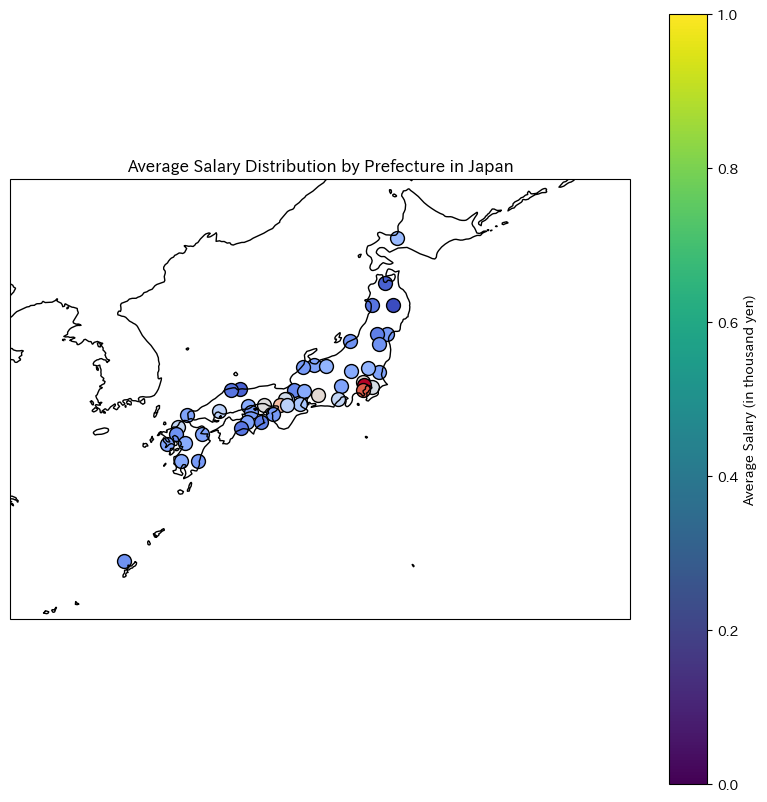

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.colors as mcolors

# 都道府県名と年収データのマッピング
location_avg_salary = {
    '北海道': 500, '青森県': 400, '岩手県': 380, '宮城県': 460, '秋田県': 420, '山形県': 430,
    '福島県': 450, '茨城県': 470, '栃木県': 490, '群馬県': 480, '埼玉県': 600, '千葉県': 580,
    '東京都': 800, '神奈川県': 750, '新潟県': 450, '富山県': 470, '石川県': 460, '福井県': 440,
    '山梨県': 470, '長野県': 490, '岐阜県': 480, '静岡県': 550, '愛知県': 600, '三重県': 520,
    '滋賀県': 530, '京都府': 570, '大阪府': 650, '兵庫県': 590, '奈良県': 540, '和歌山県': 460,
    '鳥取県': 400, '島根県': 420, '岡山県': 480, '広島県': 540, '山口県': 470, '徳島県': 430,
    '香川県': 460, '愛媛県': 470, '高知県': 420, '福岡県': 550, '佐賀県': 450, '長崎県': 470,
    '熊本県': 480, '大分県': 470, '宮崎県': 460, '鹿児島県': 480, '沖縄県': 450
}

# 都道府県の代表座標
prefecture_coords = {
    '北海道': (141.3468, 43.0642), '青森県': (140.7400, 40.8244), '岩手県': (141.1527, 39.7036),
    '宮城県': (140.8719, 38.2682), '秋田県': (140.1021, 39.7186), '山形県': (140.3261, 38.2404),
    '福島県': (140.4673, 37.7503), '茨城県': (140.4466, 36.3414), '栃木県': (139.8836, 36.5657),
    '群馬県': (139.0607, 36.3911), '埼玉県': (139.6489, 35.8569), '千葉県': (140.1233, 35.6040),
    '東京都': (139.6917, 35.6895), '神奈川県': (139.6425, 35.4478), '新潟県': (139.0236, 37.9026),
    '富山県': (137.2113, 36.6953), '石川県': (136.6256, 36.5941), '福井県': (136.2216, 35.4331),
    '山梨県': (138.5684, 35.6636), '長野県': (137.8133, 36.6513), '岐阜県': (136.7223, 35.3918),
    '静岡県': (138.3831, 34.9756), '愛知県': (137.4130, 35.1802), '三重県': (136.5086, 34.7303),
    '滋賀県': (135.8686, 35.0044), '京都府': (135.7681, 35.0116), '大阪府': (135.5022, 34.6937),
    '兵庫県': (134.6917, 34.6913), '奈良県': (135.8327, 34.6851), '和歌山県': (135.1675, 34.2260),
    '鳥取県': (133.5010, 35.5036), '島根県': (133.0505, 35.4723), '岡山県': (133.9195, 34.6618),
    '広島県': (132.4553, 34.3963), '山口県': (130.8389, 34.1859), '徳島県': (134.5595, 33.8396),
    '香川県': (134.0434, 34.3405), '愛媛県': (133.8333, 33.8416), '高知県': (133.5310, 33.5581),
    '福岡県': (130.4017, 33.5900), '佐賀県': (130.2987, 33.2490), '長崎県': (129.8737, 32.7552),
    '熊本県': (130.7417, 32.7898), '大分県': (131.6126, 33.2382), '宮崎県': (131.4231, 31.9111),
    '鹿児島県': (130.5571, 31.9200), '沖縄県': (127.6809, 26.9124)
}

# 年収の範囲を色分けするために設定
salary_values = list(location_avg_salary.values())
norm = mcolors.Normalize(vmin=min(salary_values), vmax=max(salary_values))
cmap = plt.cm.coolwarm

# 地図を描画
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# 海岸線と国境線の描画
ax.coastlines()
ax.set_extent([122, 153, 24, 46], crs=ccrs.PlateCarree())

# 都道府県ごとの年収データを色付きの点でプロット
for prefecture, (lon, lat) in prefecture_coords.items():
    salary = location_avg_salary.get(prefecture, 0)
    ax.scatter(lon, lat, c=[salary], cmap=cmap, s=100, edgecolors='black', norm=norm, transform=ccrs.PlateCarree())

# カラーバーを追加
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical')
cbar.set_label('Average Salary (in thousand yen)')

# タイトル
ax.set_title('Average Salary Distribution by Prefecture in Japan')

# 地図を表示
plt.show()

# 検証の考察1
コロナ禍による強制的なリモートワークの整備により、労働者の所在地は無関係でzoomやミーティングによる相互作用的な働き方ができるようになっている。しかし、各都道府県ごとの平均年収を可視化すると東京や京都・大阪周辺の平均値が高くなっており、本社勤めの風習が払拭しきれていないことは明白であった。

# 年収の中央値・標準偏差からも見てみる

In [16]:
#年収の標準偏差と中央値
std_dev = df['salary_numeric'].std()
median_value = df['salary_numeric'].median()

print(f"標準偏差: {std_dev}")
print(f"中央値: {median_value}")





標準偏差: 116.23695372713749
中央値: 525.0


In [21]:
import numpy as np

# サンプルデータ
data = {
    'id': [1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20],
    'salary_numeric': [675.0, 625.0, 475.0, 825.0, 650.0, 450.0, 475.0, 400.0, 475.0, 500.0, 800.0, 400.0, 525.0, 650.0, 550.0, 625.0],
    'location': [
        '東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県',
        '東京都、宮城県、愛知県、大阪府、広島県、愛媛県、福岡県',
        '東京都、神奈川県、大阪府',
        '東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、熊本県、大分県、宮崎県、鹿児島県、沖縄県',
        '東京都、神奈川県、埼玉県、千葉県、北海道、青森県、岩手県、宮城県、秋田県、山形県、福島県、茨城県、栃木県、群馬県、新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県、三重県、滋賀県、京都府、大阪府、兵庫県、奈良県、和歌山県、鳥取県、島根県、岡山県、広島県、山口県、徳島県、香川県、愛媛県、高知県、福岡県、佐賀県、長崎県、熊本県、大分県、宮崎県、鹿児島県、沖縄県',
        '東京都、神奈川県、埼玉県、千葉県、愛知県、大阪府、福岡県'
    ]
}

# マッピングの準備
location_mapping = {}

# location列を、都道府県ごとに分割してマッピング
for idx, loc_str in enumerate(data['location']):
    locations = loc_str.split('、')  # 「、」で分割
    for location in locations:
        if location not in location_mapping:
            location_mapping[location] = []
        location_mapping[location].append({
            'id': data['id'][idx],
            'salary_numeric': data['salary_numeric'][idx]
        })


# 各都道府県ごとの標準偏差と中央値を表示
for location, info in location_mapping.items():
    salary_values = [entry['salary_numeric'] for entry in info]
    std_dev = np.std(salary_values)
    median_value = np.median(salary_values)

    print(f"Location: {location}")
    print(f"  標準偏差: {std_dev}")
    print(f"  中央値: {median_value}")




Location: 東京都
  標準偏差: 126.38125740085917
  中央値: 637.5
Location: 神奈川県
  標準偏差: 138.38352503098048
  中央値: 650.0
Location: 埼玉県
  標準偏差: 133.46347815039138
  中央値: 662.5
Location: 千葉県
  標準偏差: 133.46347815039138
  中央値: 662.5
Location: 北海道
  標準偏差: 77.28015412913086
  中央値: 675.0
Location: 青森県
  標準偏差: 77.28015412913086
  中央値: 675.0
Location: 岩手県
  標準偏差: 77.28015412913086
  中央値: 675.0
Location: 宮城県
  標準偏差: 77.81187248742958
  中央値: 662.5
Location: 秋田県
  標準偏差: 77.28015412913086
  中央値: 675.0
Location: 愛知県
  標準偏差: 132.87682265918312
  中央値: 637.5
Location: 大阪府
  標準偏差: 135.46217184144066
  中央値: 625.0
Location: 広島県
  標準偏差: 88.97565210026093
  中央値: 650.0
Location: 愛媛県
  標準偏差: 88.97565210026093
  中央値: 650.0
Location: 福岡県
  標準偏差: 132.87682265918312
  中央値: 637.5
Location: 山形県
  標準偏差: 87.5
  中央値: 737.5
Location: 福島県
  標準偏差: 87.5
  中央値: 737.5
Location: 茨城県
  標準偏差: 87.5
  中央値: 737.5
Location: 栃木県
  標準偏差: 87.5
  中央値: 737.5
Location: 群馬県
  標準偏差: 87.5
  中央値: 737.5
Location: 新潟県
  標準偏差: 87.5
  中央値: 737.5
Location: 

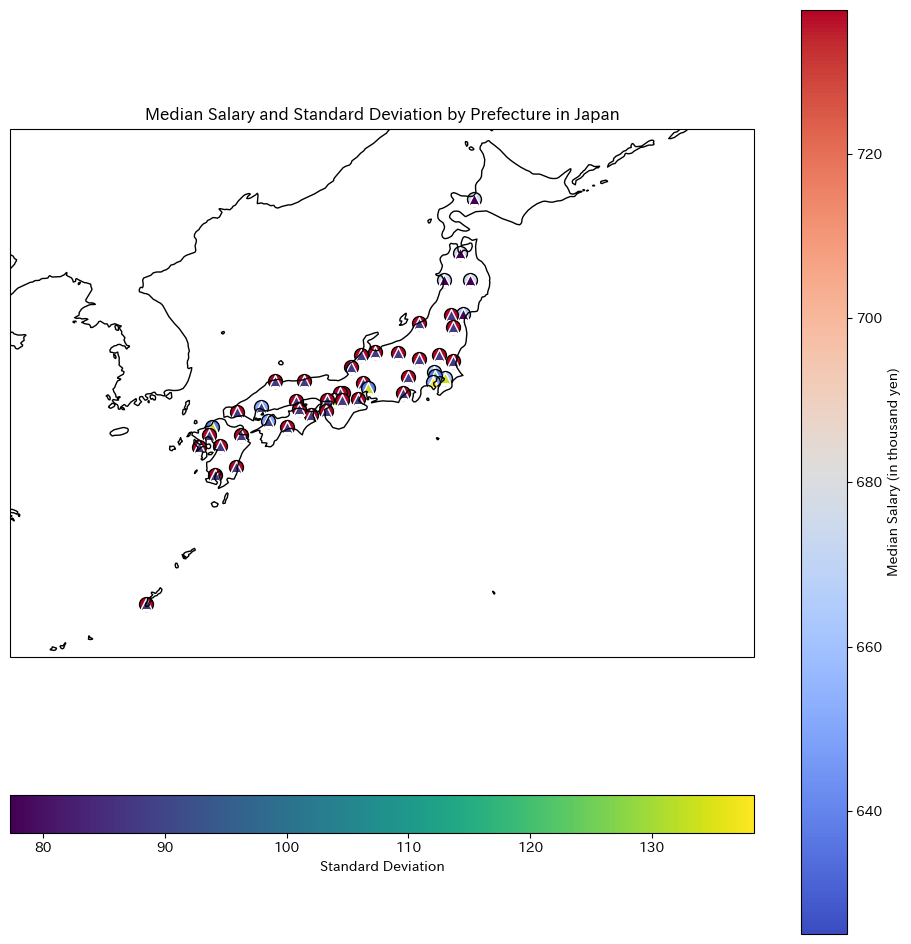

In [30]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.colors as mcolors

# データ準備: 都道府県名と中央値・標準偏差のデータ
location_data = {
    '北海道': {'median': 675.0, 'std_dev': 77.28015412913086},
    '青森県': {'median': 675.0, 'std_dev': 77.28015412913086},
    '岩手県': {'median': 675.0, 'std_dev': 77.28015412913086},
    '宮城県': {'median': 662.5, 'std_dev': 77.81187248742958},
    '秋田県': {'median': 675.0, 'std_dev': 77.28015412913086},
    '山形県': {'median': 737.5, 'std_dev': 87.5},
    '福島県': {'median': 737.5, 'std_dev': 87.5},
    '茨城県': {'median': 737.5, 'std_dev': 87.5},
    '栃木県': {'median': 737.5, 'std_dev': 87.5},
    '群馬県': {'median': 737.5, 'std_dev': 87.5},
    '埼玉県': {'median': 662.5, 'std_dev': 133.46347815039138},
    '千葉県': {'median': 662.5, 'std_dev': 133.46347815039138},
    '東京都': {'median': 637.5, 'std_dev': 126.38125740085917},
    '神奈川県': {'median': 650.0, 'std_dev': 138.38352503098048},
    '新潟県': {'median': 737.5, 'std_dev': 87.5},
    '富山県': {'median': 737.5, 'std_dev': 87.5},
    '石川県': {'median': 737.5, 'std_dev': 87.5},
    '福井県': {'median': 737.5, 'std_dev': 87.5},
    '山梨県': {'median': 737.5, 'std_dev': 87.5},
    '長野県': {'median': 737.5, 'std_dev': 87.5},
    '岐阜県': {'median': 737.5, 'std_dev': 87.5},
    '静岡県': {'median': 737.5, 'std_dev': 87.5},
    '愛知県': {'median': 637.5, 'std_dev': 132.87682265918312},
    '三重県': {'median': 737.5, 'std_dev': 87.5},
    '滋賀県': {'median': 737.5, 'std_dev': 87.5},
    '京都府': {'median': 737.5, 'std_dev': 87.5},
    '大阪府': {'median': 625.0, 'std_dev': 135.46217184144066},
    '兵庫県': {'median': 737.5, 'std_dev': 87.5},
    '奈良県': {'median': 737.5, 'std_dev': 87.5},
    '和歌山県': {'median': 737.5, 'std_dev': 87.5},
    '鳥取県': {'median': 737.5, 'std_dev': 87.5},
    '島根県': {'median': 737.5, 'std_dev': 87.5},
    '岡山県': {'median': 737.5, 'std_dev': 87.5},
    '山口県': {'median': 737.5, 'std_dev': 87.5},
    '徳島県': {'median': 737.5, 'std_dev': 87.5},
    '香川県': {'median': 737.5, 'std_dev': 87.5},
    '愛媛県': {'median': 650.0, 'std_dev': 88.97565210026093},
    '高知県': {'median': 737.5, 'std_dev': 87.5},
    '福岡県': {'median': 637.5, 'std_dev': 132.87682265918312},
    '佐賀県': {'median': 737.5, 'std_dev': 87.5},
    '長崎県': {'median': 737.5, 'std_dev': 87.5},
    '熊本県': {'median': 737.5, 'std_dev': 87.5},
    '大分県': {'median': 737.5, 'std_dev': 87.5},
    '宮崎県': {'median': 737.5, 'std_dev': 87.5},
    '鹿児島県': {'median': 737.5, 'std_dev': 87.5},
    '沖縄県': {'median': 737.5, 'std_dev': 87.5},
    '広島県': {'median': 650.0, 'std_dev': 88.97565210026093}
}

# 都道府県の代表座標
prefecture_coords = {
    '北海道': (141.3468, 43.0642), '青森県': (140.7400, 40.8244), '岩手県': (141.1527, 39.7036),
    '宮城県': (140.8719, 38.2682), '秋田県': (140.1025, 39.7186), '山形県': (140.3634, 38.2404),
    '福島県': (140.4676, 37.7503), '茨城県': (140.4468, 36.3418), '栃木県': (139.8836, 36.5657),
    '群馬県': (139.0609, 36.3911), '埼玉県': (139.6489, 35.8569), '千葉県': (140.1233, 35.6051),
    '東京都': (139.6917, 35.6895), '神奈川県': (139.6425, 35.4478), '新潟県': (139.0232, 37.9022),
    '富山県': (137.2137, 36.6953), '石川県': (136.6256, 36.5944), '福井県': (136.2216, 36.0652),
    '山梨県': (138.5684, 35.6639), '長野県': (138.1812, 36.6514), '岐阜県': (136.7223, 35.3912),
    '静岡県': (138.3831, 34.9769), '愛知県': (136.9066, 35.1802), '三重県': (136.5086, 34.7303),
    '滋賀県': (135.8686, 35.0045), '京都府': (135.7681, 35.0116), '大阪府': (135.5022, 34.6937),
    '兵庫県': (135.1955, 34.6913), '奈良県': (135.8328, 34.6851), '和歌山県': (135.1675, 34.2304),
    '鳥取県': (134.2384, 35.5036), '島根県': (133.0505, 35.4723), '岡山県': (133.9344, 34.6654),
    '広島県': (132.4553, 34.3963), '山口県': (131.4714, 34.1859), '徳島県': (134.5593, 34.0657),
    '香川県': (134.0434, 34.3402), '愛媛県': (132.7657, 33.8416), '高知県': (133.5311, 33.5597),
    '福岡県': (130.4181, 33.5904), '佐賀県': (130.2988, 33.2494), '長崎県': (129.8737, 32.7448),
    '熊本県': (130.7417, 32.7898), '大分県': (131.6126, 33.2382), '宮崎県': (131.4239, 31.9111),
    '鹿児島県': (130.5581, 31.5602), '沖縄県': (127.6811, 26.2124)
}

# カラーマップと正規化設定
median_values = [v['median'] for v in location_data.values()]
std_dev_values = [v['std_dev'] for v in location_data.values()]

median_norm = mcolors.Normalize(vmin=min(median_values), vmax=max(median_values))
std_dev_norm = mcolors.Normalize(vmin=min(std_dev_values), vmax=max(std_dev_values))

median_cmap = plt.cm.coolwarm
std_dev_cmap = plt.cm.viridis

# 地図描画
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
ax.set_extent([122, 153, 24, 46], crs=ccrs.PlateCarree())

# 都道府県ごとにプロット
for prefecture, coord in prefecture_coords.items():
    data = location_data[prefecture]
    ax.scatter(*coord, c=[data['median']], cmap=median_cmap, s=100, edgecolors='black',
               norm=median_norm, transform=ccrs.PlateCarree(), label='Median Salary (Circle)')
    ax.scatter(*coord, c=[data['std_dev']], cmap=std_dev_cmap, s=70, edgecolors='white',
               norm=std_dev_norm, transform=ccrs.PlateCarree(), marker='^', label='Standard Deviation (Triangle)')

# カラーバー設定
median_cbar = plt.colorbar(plt.cm.ScalarMappable(norm=median_norm, cmap=median_cmap), ax=ax, orientation='vertical')
median_cbar.set_label('Median Salary (in thousand yen)')

std_dev_cbar = plt.colorbar(plt.cm.ScalarMappable(norm=std_dev_norm, cmap=std_dev_cmap), ax=ax, orientation='horizontal')
std_dev_cbar.set_label('Standard Deviation')

# タイトル
ax.set_title('Median Salary and Standard Deviation by Prefecture in Japan')

plt.show()

# 考察2
都道府県ごとの年収には明確な地域差が見られた。特に、東京都や神奈川県、愛知県、大阪府などの都市圏では年収の中央値が高く、経済活動の活発さが反映されている。しかし、標準偏差が大きいことから、企業や業種による収入のばらつきも大きいと考えられる。これに対し、地方では年収のばらつきが小さく、比較的安定している傾向が見られる。コロナ禍でリモートワークが広がったものの、依然として本社勤めの影響が残っており、特に都市部の年収水準が高いことが示されている。労働者の所在地に関わらず働き方が変化している一方で、地域ごとの経済格差は依然として存在していることが浮き彫りになった。